<a href="https://colab.research.google.com/github/shadab4150/student-records-analysis-between-various-factors-such-as-alcohol-intake-marks-etc/blob/master/Student_predict_final_score_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Final grade of students based on various factors.
* address, internet use, alcohol consumption, romantic life, etc
### Prepared by shadab  sayeed

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
%matplotlib inline

In [0]:
student=pd.read_csv('student-por.csv',sep=';')

In [60]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,low,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,low,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,low,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,low,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,low,11,13,13


In [14]:
student.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [8]:
student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
student=student.dropna()

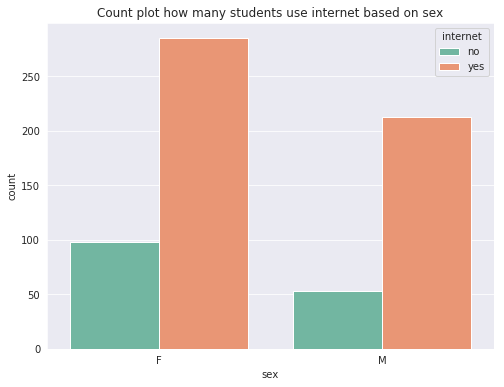

In [261]:
plt.figure(1,figsize=(8,6))
sns.countplot(x='sex',data=student,palette='Set2',hue='internet')
plt.title('Count plot how many students use internet based on sex')
plt.show()

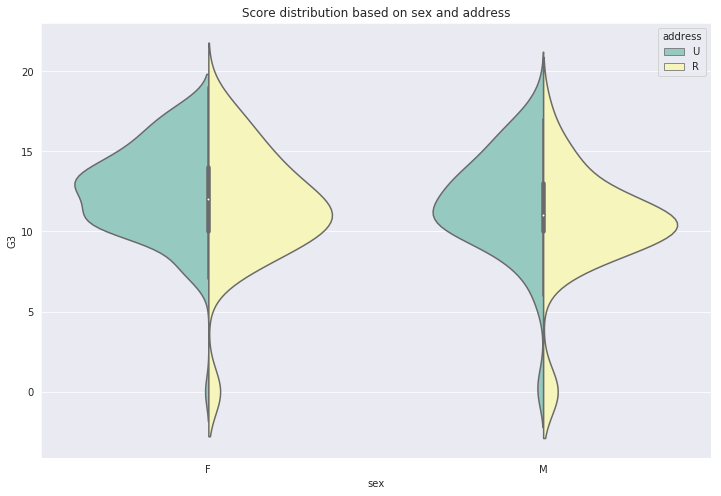

In [247]:
plt.figure(1,figsize=(12,8))
sns.violinplot(x='sex',y='G3',data=student,hue='address',split=True,palette='Set3')
plt.title('Score distribution based on sex and address')
plt.show()

In [9]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
student.shape

(649, 33)

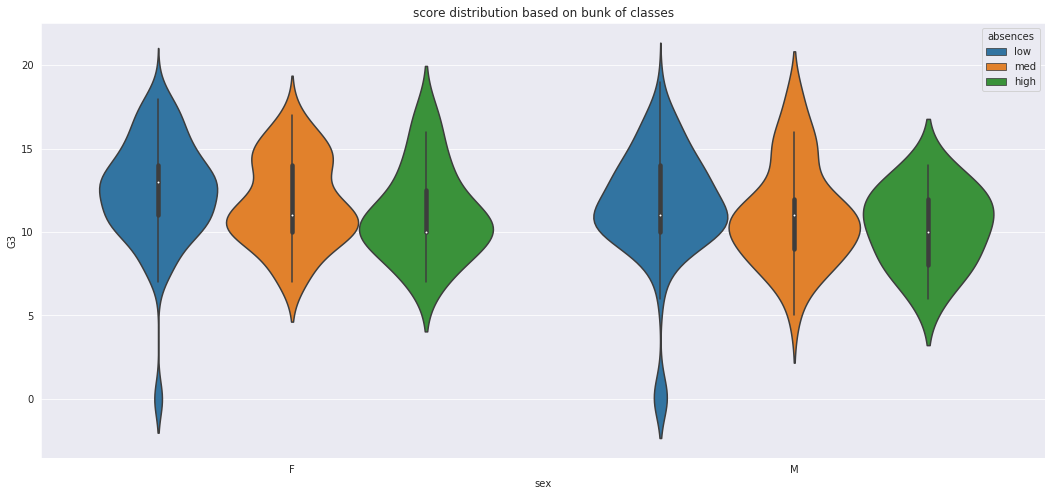

In [250]:
plt.figure(1,figsize=(18,8))
sns.violinplot(x='sex',y='G3',data=student,hue='absences')
plt.title('score distribution based on bunk of classes')
plt.show()

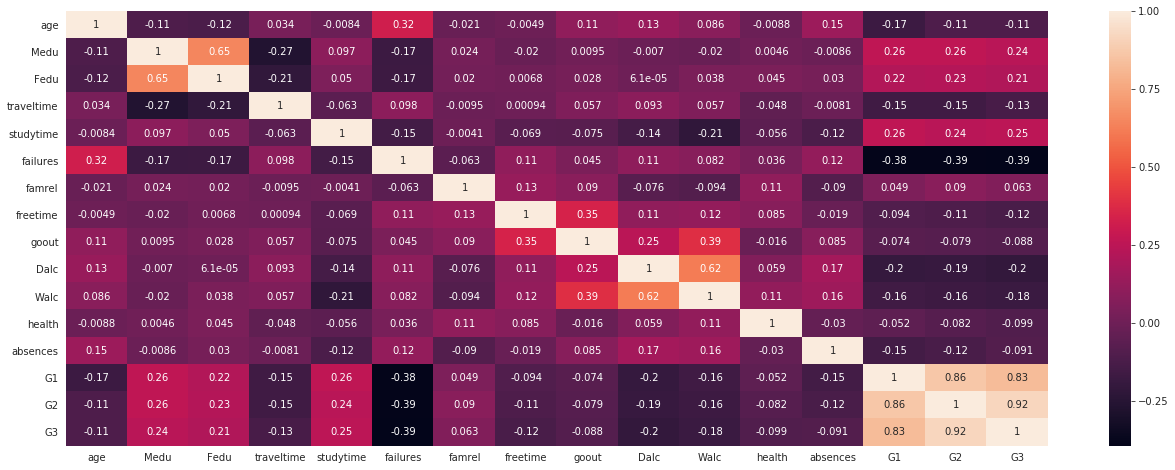

In [34]:
plt.figure(1,figsize=(22,8))
sns.heatmap(student.corr(),annot=True)

In [0]:
def absent(x):
  if x<=6:
    return 'low'
  elif x>6 and x<=12:
    return 'med'
  elif x>12:
    return 'high'

In [0]:
student.absences=student.absences.apply(absent,convert_dtype=True)

In [0]:
df=student.copy()

In [0]:
features=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

In [0]:
features1=['school', 'sex','age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences','G1','G2']

In [72]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,low,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,low,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,low,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,low,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,low,11,13,13


In [68]:
df.shape[0]

649

In [0]:
y=df[['G3']].copy()

In [76]:
y.head()

,G3
0,11
1,11
2,12
3,14
4,13


In [0]:
X=df[features1].copy()

In [129]:
X.head()

,age,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,...,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_high,absences_low,absences_med
0,18,0,11,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,17,9,11,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,15,12,13,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,15,14,14,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,16,11,13,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [0]:
X=pd.get_dummies(X,columns=features)

In [0]:
X1=df[features1].copy()

In [83]:
X1.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,low,0,11
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,low,9,11
2,GP,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,low,12,13
3,GP,F,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,low,14,14
4,GP,F,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,low,11,13


In [87]:
X1.shape

(649, 31)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [131]:
X_train.shape

(434, 101)

In [132]:
y_test.shape

(215, 1)

In [133]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_prediction = regressor.predict(X_test)
y_prediction

In [135]:
y_test.describe()

,G3
count,215.000000
mean,11.981395
std,3.423343
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


In [0]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [137]:
print(RMSE)

1.4751369615164729


# So far linear regressor has least RMSE.
# Linear regressor RMSE=1.4751369615164729


In [138]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [139]:
y_prediction1 = regressor.predict(X_test)
y_prediction1

array([12., 12., 10., 11., 14., 13., 14.,  0., 11., 15., 12., 15., 14.,
       14., 15., 10., 17., 11., 17., 10., 13.,  7., 13., 11., 17., 10.,
       13., 13., 10., 17., 14., 11.,  7., 11., 14., 10., 11., 12., 10.,
       13., 12., 18.,  8., 13., 16.,  9., 12., 10., 13., 15., 10., 11.,
       11., 17., 16., 10., 11., 11., 10., 11., 13., 15., 10., 15., 13.,
       11., 10., 11.,  0., 11., 10., 10., 14., 10., 11., 12., 11., 13.,
       10.,  8.,  8., 11., 11., 13., 15., 14., 12., 11., 15., 13., 13.,
       11., 11., 16., 16., 15., 13., 15.,  8., 18., 12., 11., 13., 15.,
       15., 11., 10., 10., 17., 10., 17., 10., 11., 10., 11., 14.,  0.,
        8., 11., 18., 12., 11., 16., 11., 14., 14.,  0., 15., 16., 11.,
       12., 14., 11., 13., 12., 12., 14., 12.,  7., 17., 13., 10., 12.,
       13., 11., 12., 15., 11., 17., 13., 12., 15., 13., 10., 12., 15.,
       11., 16., 11., 16., 13., 10., 12., 15., 13.,  8.,  9., 14., 15.,
       11., 10., 11., 12., 11., 10., 15., 15., 13., 17., 11.,  7

In [0]:
y_prediction12=pd.DataFrame(y_prediction1,columns=['prediction1'])


In [159]:
y_prediction12.shape

(215, 1)

In [160]:
y_prediction2.shape

(215, 1)

In [0]:
y_prediction2=pd.DataFrame(y_prediction,columns=['prediction_linear'])

In [0]:
RMSE_D = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction1))

In [141]:
print(RMSE_D)

1.7212758923758906


# So far linear regressor has least RMSE.

# Decision tress regressor RMSE=1.7212758923758906

In [161]:
y_test.shape

(215, 1)

In [177]:
X_test1.head()

,age,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,...,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_high,absences_low,absences_med,score
442,15,12,13,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,12.5
598,18,10,11,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,10.5
481,17,9,10,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,9.5
89,16,9,9,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,9.0
134,17,13,12,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,12.5


In [0]:
X_test1=X_test.copy()

In [0]:
X_test1['score']=(X_test['G1']+X_test['G2'])/2

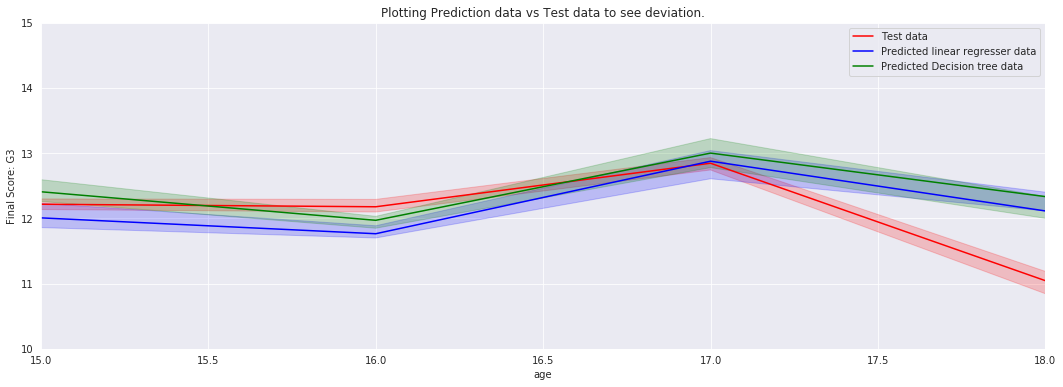

In [246]:
sns.set_style('darkgrid')
plt.figure(1,figsize=(18,6))
sns.lineplot(x=X_test1.age,y=y_test['G3'],color='red',label='Test data',markers=True,dashes=False,ci=20)
sns.lineplot(x=X_test1.age,y=y_prediction2.prediction_linear,color='blue',label='Predicted linear regresser data',ci=20,)
sns.lineplot(x=X_test1.age,y=y_prediction12.prediction1,color='green',label='Predicted Decision tree data',ci=20)
plt.title("Plotting Prediction data vs Test data to see deviation.")
plt.ylabel('Final Score: G3')
plt.xlim(15,18)
plt.ylim(10,15)
plt.legend()
plt.show()

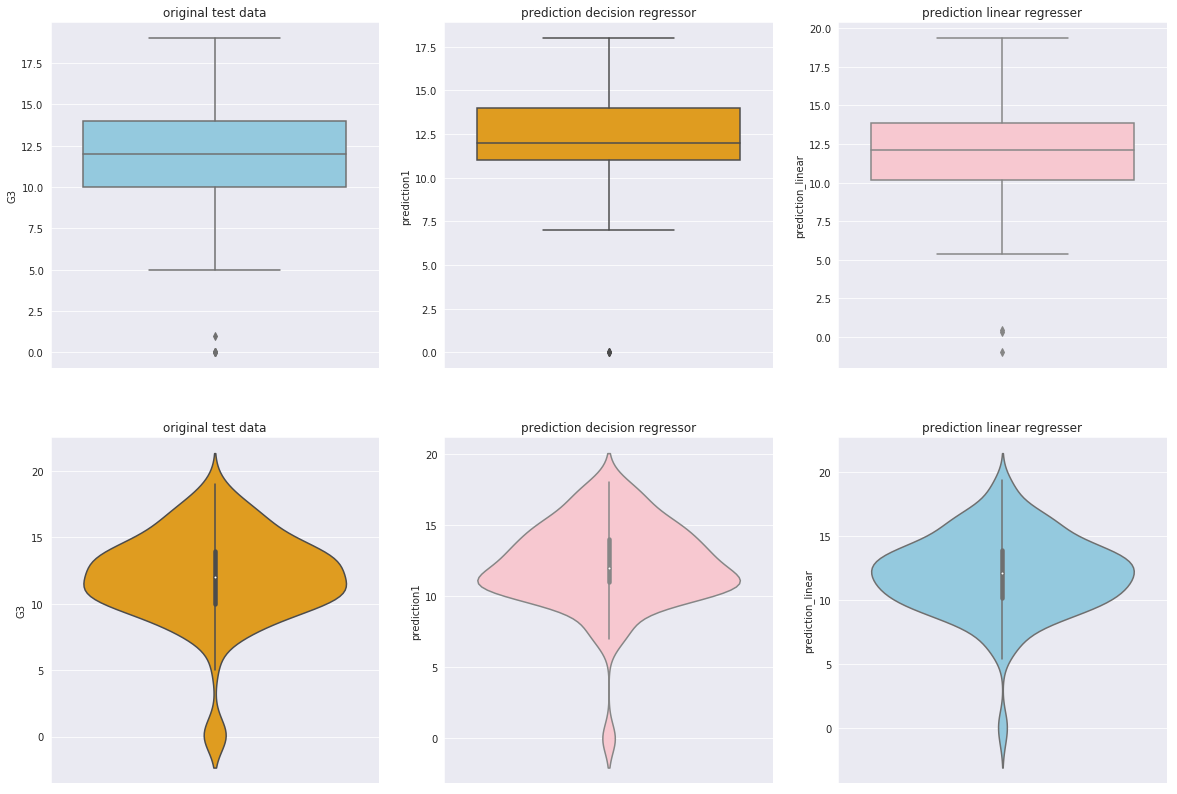

In [208]:
plt.figure(1,figsize=(20,14))
plt.subplot(231)
sns.boxplot(y='G3',data=y_test,color='skyblue')
plt.title('original test data')
plt.subplot(232)
sns.boxplot(y='prediction1',data=y_prediction12,color='orange')
plt.title('prediction decision regressor')
plt.subplot(233)
sns.boxplot(y='prediction_linear',data=y_prediction2,color='pink')
plt.title('prediction linear regresser')
plt.subplot(234)
sns.violinplot(y='G3',data=y_test,color='orange')
plt.title('original test data')
plt.subplot(235)
sns.violinplot(y='prediction1',data=y_prediction12,color='pink')
plt.title('prediction decision regressor')
plt.subplot(236)
sns.violinplot(y='prediction_linear',data=y_prediction2,color='skyblue')
plt.title('prediction linear regresser')
plt.show()


# So far linear regressor has least RMSE.
# Linear regressor RMSE=1.4751369615164729
# Decision tress regressor RMSE=1.7212758923758906